In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the data from sheet1

MHealth = pd.read_excel(r"MHealthData.xlsx", sheet_name=0)

# Copy to back-up file

MHealth_bk = MHealth.copy()

# Display first 5 records

MHealth.head()

,Patient_ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24
0,AS90881913,-9.8184,0.009971,0.29563,0.004186,0.004186,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-0.370000,-0.36327,0.29963,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,-2.35000,-1.610200,-0.030899,0
1,AX69209031,-9.8489,0.524040,0.37348,0.004186,0.016745,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-0.197990,-0.18151,0.58298,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,-2.16320,-0.882540,0.326570,0
2,JE70676749,-9.6602,0.181850,0.43742,0.016745,0.037677,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-0.374170,0.18723,0.43851,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,-1.61750,-0.165620,-0.030693,0
3,AR24418414,-9.6507,0.214220,0.24033,0.079540,0.117220,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-0.017271,0.18366,0.57571,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,-1.07710,0.006945,-0.382620,0
4,JF34937940,-9.7030,0.303890,0.31156,0.221870,0.205130,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-0.374390,-0.54671,0.44586,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,-0.53684,0.175900,-1.095500,0


In [3]:
# Display information of the dataset

MHealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161280 entries, 0 to 161279
Data columns (total 25 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Patient_ID  161280 non-null  object 
 1   V1          161280 non-null  float64
 2   V2          161280 non-null  float64
 3   V3          161280 non-null  float64
 4   V4          161280 non-null  float64
 5   V5          161280 non-null  float64
 6   V6          161280 non-null  float64
 7   V7          161280 non-null  float64
 8   V8          161280 non-null  float64
 9   V9          161280 non-null  float64
 10  V10         161280 non-null  float64
 11  V11         161280 non-null  float64
 12  V12         161280 non-null  float64
 13  V13         161280 non-null  float64
 14  V14         161280 non-null  float64
 15  V15         161280 non-null  float64
 16  V16         161280 non-null  float64
 17  V17         161280 non-null  float64
 18  V18         161280 non-null  float64
 19  V1

In [4]:
# Check for the missing values

MHealth.isnull().sum()

Patient_ID    0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
dtype: int64

In [5]:
# Display Unique values of variables

MHealth.nunique()

Patient_ID    161280
V1             55255
V2            114377
V3            104360
V4              1585
V5              2006
V6             93728
V7             46321
V8            115219
V9              1304
V10             1111
V11             1237
V12           100714
V13           100200
V14           102758
V15            93099
V16            87319
V17            85325
V18             1302
V19             1372
V20             1231
V21           110903
V22           107467
V23           109249
V24               13
dtype: int64

In [6]:
# Delete the Patient_ID

del MHealth['Patient_ID']

In [7]:
# Identify the Independent and Target variables

IndepVar = []
for col in MHealth.columns:
    if col != 'V24':
        IndepVar.append(col)

TargetVar = 'V24'

x = MHealth[IndepVar]
y = MHealth[TargetVar]

In [8]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [9]:
# Display the shape of train and test data after split

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((112896, 23), (48384, 23), (112896,), (48384,))

In [10]:
# To build the 'Multinominal Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression

# Create the model object

MHealthLR = LogisticRegression(multi_class='multinomial', penalty='none', solver='newton-cg', random_state=0)

# Train the model with Training data

MHealthLR = MHealthLR.fit(x_train,y_train)

# Predict the model with test data

y_pred = MHealthLR.predict(x_test)
y_pred_prob = MHealthLR.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred

# Class = Label 0-12

lst_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
#-----print final predictions-----

# OVERALL - FINAL PREDICTION PERFORMANCE

# importing mean() 

from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)));

[[35591   870    62     1   624   807   163   562   728   267   451   294
    134]
 [  160     0     0     0     0    13     0     0     0     0     0     0
      1]
 [  433     0   859     0     0    24     0     0     0     0     0     8
      0]
 [  261     0     0   897     0     0     0     0     0     0     0     0
      0]
 [  136     0     0     0   313     8     0     0     0     0     0     1
      0]
 [   21     0     0     0     0     3     0     0     0     0     0    12
      0]
 [  149     0     0     0     1    10   739     0     0     0     0     0
      0]
 [  189     0     0     0     0     3     0   346     3     0     0     0
      0]
 [  172     0     0     0     0    54     0     0   285     0     0     0
      0]
 [  350     0     0     0     0     0     0     0     0   646     0     1
      0]
 [  218     0     0     0     0     0     0     0     0     0   408    38
     16]
 [  174     0     0     0     0     0     0     0     0     0    43   559
     54]
 [  

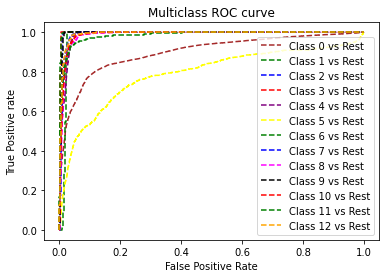

In [11]:
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 13

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='green', label='Class 6 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='blue', label='Class 7 vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='magenta', label='Class 8 vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='black', label='Class 9 vs Rest')
plt.plot(fpr[10], tpr[10], linestyle='--',color='red', label='Class 10 vs Rest')
plt.plot(fpr[11], tpr[11], linestyle='--',color='green', label='Class 11 vs Rest')
plt.plot(fpr[12], tpr[12], linestyle='--',color='orange', label='Class 12 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')  

In [12]:
# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred_prob, multi_class='ovo', average='weighted'),3))

roc_auc_score: 0.946


In [13]:
# Results
pd.set_option("display.max_rows", None)

PredResults = pd.DataFrame({'V24':y_test, 'V24_Pred':y_pred})

# Merge two Dataframes on index of both the dataframes

TestDataResults = MHealth_bk.merge(PredResults, left_index=True, right_index=True)
TestDataResults.sample(5)

,Patient_ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24_x,V24_y,V24_Pred
64117,YI91273289,-10.0830,0.617050,-0.070781,-0.133960,-0.012559,3.04500,-9.6943,-1.11050,-0.32653,-0.84240,0.44597,-7.95090,1.36390,0.28968,-2.9713,-8.42150,0.84976,-0.89020,-0.609860,0.19181,-8.1757,-9.6678,-13.0630,8,8,0
95318,ZY20848084,-10.1900,-0.077737,-0.396470,0.159080,-0.159080,2.50930,-9.6591,-0.56203,-0.36178,-0.91182,-0.38114,-2.51590,-1.07580,-0.37182,-1.5705,9.04000,5.00410,-0.45098,0.981520,-0.13793,-21.4580,8.5838,56.5250,0,0,0
33716,HI96081066,-8.2645,-2.430200,-3.629200,0.058608,-0.117220,0.28160,-8.6820,1.11040,-0.59184,-0.89493,-0.44990,-1.48160,26.43700,7.26890,-9.4403,-0.19260,-1.25960,-0.82353,0.184800,-0.57974,-18.0300,10.2840,-60.3910,0,0,0
120652,XH74152426,-9.7010,2.224000,-0.789310,-0.209310,-0.066981,-0.63096,-9.9065,-0.55372,0.46382,-0.82176,-0.46955,-0.31374,-0.54732,-1.57560,-2.7944,-0.48691,8.30900,-0.43137,-0.603700,0.89009,-19.4230,50.5190,5.2435,0,0,0
87040,NJ62347582,-9.7689,0.062292,0.163500,0.016745,-0.267920,-3.58040,-18.9780,22.98400,0.38219,-0.88555,-0.36739,40.13700,-198.02000,-44.27700,4.4375,6.00410,4.41480,0.82549,0.082136,0.75000,5.5629,35.6470,-41.4000,0,0,0
